In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## EigenTransfer Algorithm in Transfer Learning

In transfer learning, we are given two target data sets: a target training data set $ X_t = \{x_t^{(i)}\}_{i=1}^{n_t} $ with labels, and a target test data set $ X_u = \{x_u^{(i)}\}_{i=1}^{n_u} $ to be predicted. Different from traditional machine learning, we are also given an auxiliary data set $ X_a = \{x_a^{(i)}\}_{i=1}^{m} $ to help with target learning.

In **spectral learning**, the input is a weighted graph $ G = (V, E) $ to represent the target task, where $ V = \{v_i\}_{i=1}^{n} $ and $ E = \{e_{ij}\}_{i,j=1}^{n} $ represent the node set and the edge set in the graph, respectively. 

## Graph Construction for Transfer Learning

To apply spectral learning to transfer learning, we first construct a task graph $ G(V, E) $ in the following way:

### Node Construction:
- The nodes $ V $ in the graph $ G $ represent features $ \{f^{(i)}\}_{i=1}^{s} $, instances $ \{x_t^{(i)}\}_{i=1}^{n_t}, \{x_a^{(i)}\}_{i=1}^{m}, \{x_u^{(i)}\}_{i=1}^{n_u} $, or class labels $ C(x_i) $.

### Edge Construction:
- The edges $ E $ represent the relations between these nodes, where the weights of the edges are based on the number of co-occurrences between the end nodes in the target and auxiliary data.
- Consequently, the task graph $ G(V, E) $ contains almost all the information for the transfer learning task, including both the target data and the auxiliary data.

Usually, the task graph $ G $ is sparse, symmetric, real, and positive semi-definite. Therefore, the spectra of the graph $ G $ can be calculated very efficiently.

## Unified Framework for Graph Transfer Learning

The unified framework for graph transfer learning can be broken down into two major steps:

### Step 1: Construct the Weight Graph $ G(V, E) $

1. **Cross-domain learning**: The graph $ G(V, E) $ is constructed as follows:

$$
V = X_t \cup X_a \cup X_u \cup F \cup C
$$

The edge weights are defined as:

$$
e_{ij} = 
\begin{cases} 
\phi_{v_i, v_j}, & \text{if } v_i \in X_t \cup X_a \cup X_u \text{ and } v_j \in F \\
\phi_{v_j, v_i}, & \text{if } v_i \in F \text{ and } v_j \in X_t \cup X_a \cup X_u \\
1, & \text{if } v_i \in X_t \text{ and } v_j \in C \text{ with } C(v_i) = v_j \\
1, & \text{if } v_i \in C \text{ and } v_j \in X_t \text{ with } C(v_j) = v_i \\
1, & \text{if } v_i \in X_a \text{ and } v_j \in C \text{ with } C(v_i) = v_j \\
0, & \text{otherwise}
\end{cases}
$$

2. **Cross-category learning**: The graph is given by:

$$
V = X_t \cup X_a \cup X_u \cup F \cup C_t \cup C_a
$$

The edge weights are defined similarly, but include both category labels $ C_t $ and $ C_a $ for the target and auxiliary data, respectively.

3. **Self-taught learning**: The graph is constructed as:

$$
V = X_t \cup X_a \cup X_u \cup F \cup C_t
$$

The edge weights are similarly constructed, where $ C_t $ refers to the class labels in the target task.

### Step 2: Learning Graph Spectra

1. **Adjacency Matrix Construction**: Construct the adjacency matrix $ W \in \mathbb{R}^{n \times n} $ corresponding to the graph $ G(V, E) $:

$$
W = 
\begin{bmatrix}
w_{11} & \cdots & w_{1n} \\
\vdots & \ddots & \vdots \\
w_{n1} & \cdots & w_{nn}
\end{bmatrix}
\quad \text{where} \quad w_{ij} = e_{ij}
$$

2. **Diagonal Matrix Construction**: Construct the diagonal matrix $ D $ where:

$$
D_{ij} = 
\begin{cases} 
\sum_{t=1}^{n} w_{it}, & \text{if } i = j \\
0, & \text{if } i \neq j 
\end{cases}
$$

3. **Laplacian Matrix**: Compute the Laplacian matrix of the graph $ G $:

$$
L = D - W
$$

4. **Eigen Feature Representation**: Use the **normalized cut** technique to learn the new feature representation:
   - Solve the generalized eigenproblem:

$$
L v = \lambda D v
$$

   - Compute the first \( m \) generalized eigenvectors $ v_1, v_2, \dots, v_m $.
   - Construct the new feature representation for transfer learning:

$$
U = [v_1, v_2, \dots, v_m]
$$

This graph transfer learning based on spectral features is called **EigenTransfer**. EigenTransfer can model various existing transfer learning problems and solutions by constructing a task graph to represent the learning task and then learning an eigen feature representation from the graph using spectral learning theory.

## EigenCluster Algorithm for Transfer Learning

In the new feature representation, knowledge from the auxiliary data tends to be transferred to help the target learning. The following is the **EigenCluster algorithm**, which is a unified framework for transfer learning.

## Algorithm 7: EigenCluster 

1. **Input**:
   - Target data set $ X_t = \{x_t^{(i)}\}_{i=1}^{n_t} $,
   - Auxiliary data set $ X_a = \{x_a^{(i)}\}_{i=1}^{m} $,
   - Test data set $ X_u = \{x_u^{(i)}\}_{i=1}^{k} $.

2. **Step 1**: Construct the task graph $ G(V, E) $ based on the target clustering task (refer to equations (6.20.15)–(6.20.19)).

3. **Step 2**: Construct the $ n \times n $ adjacency matrix $ W $ whose entries $ w_{ij} = e_{ij} $ are based on the task graph $ G(V, E) $.

4. **Step 3**: Calculate the diagonal matrix $ D $ using:

$$
D_{ij} = 
\begin{cases} 
\sum_{t=1}^{n} w_{it}, & \text{if } i = j \\
0, & \text{if } i \neq j 
\end{cases}
$$

5. **Step 4**: Construct the Laplacian matrix $ L = D - W $.

6. **Step 5**: Solve the generalized eigenproblem $ Lv = \lambda Dv $ to calculate the first $ N $ generalized eigenvectors $ v_1, v_2, \dots, v_N $.

7. **Step 6**: Let the matrix $ U = [v_1, v_2, \dots, v_N] $.

8. **Step 7**: For each target data point $ x_t^{(i)} \in X_t $:
   - Let $ y_t^{(i)} $ be the corresponding row in $ U $ for $ x_t^{(i)} $.

9. **Step 8**: Train a classifier based on the transformed data set $ Y_t = \{y_t^{(i)}\}_{i=1}^{n_t} $, instead of using the original target data set $ X_t = \{x_t^{(i)}\}_{i=1}^{n_t} $.

10. **Step 9**: Use the trained classifier to classify the test data $ X_u = \{x_u^{(i)}\}_{i=1}^{k} $.

11. **Output**: The classification results for the test data set $ X_u $.

---

This **EigenCluster algorithm** is useful for transfer learning, particularly when working with auxiliary and target data. The graph construction and spectral decomposition help transfer useful knowledge from the auxiliary data to improve the performance on the target task.

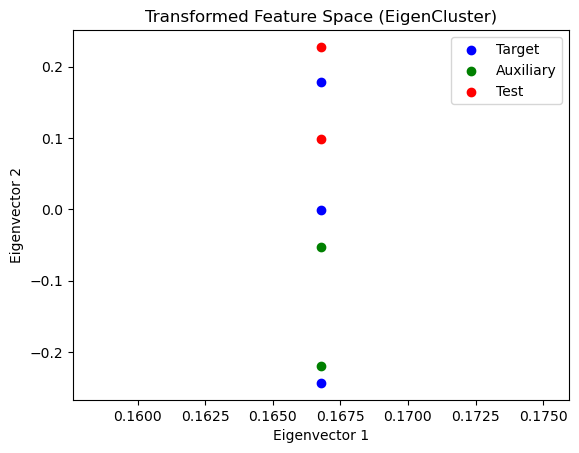

Predictions on test data: [0 0]


In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Helper function to construct adjacency matrix (W)
def construct_adjacency_matrix(Xt, Xa, Xu):
    # Combine all datasets (target, auxiliary, and unlabeled)
    X_combined = Xt + Xa + Xu
    n = len(X_combined)
    
    W = [[0 for _ in range(n)] for _ in range(n)]
    
    # Populate the adjacency matrix W with some relationship between data points
    # Here, we use a simple approach based on distances (you can customize this part)
    for i in range(n):
        for j in range(i+1, n):
            # Define weight based on similarity (you can change this metric)
            W[i][j] = W[j][i] = 1 / (1 + sum((X_combined[i][k] - X_combined[j][k]) ** 2 for k in range(len(X_combined[i]))))
    
    return W

# Helper function to construct diagonal matrix (D)
def construct_diagonal_matrix(W):
    n = len(W)
    D = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        D[i][i] = sum(W[i])
    
    return D

# Helper function to construct Laplacian matrix (L)
def construct_laplacian_matrix(D, W):
    n = len(W)
    L = [[D[i][j] - W[i][j] for j in range(n)] for i in range(n)]
    
    return L

# Helper function to perform generalized eigenvalue decomposition
def eigen_decomposition(L, D):
    from scipy.linalg import eigh
    # Perform eigenvalue decomposition on L and D
    eigvals, eigvecs = eigh(L, D)
    return eigvals, eigvecs

# Main function to run the EigenCluster algorithm
def eigencluster(Xt, Xa, Xu, k=3):
    # Step 1: Construct the task graph and adjacency matrix W
    W = construct_adjacency_matrix(Xt, Xa, Xu)
    
    # Step 2: Construct diagonal matrix D
    D = construct_diagonal_matrix(W)
    
    # Step 3: Construct Laplacian matrix L
    L = construct_laplacian_matrix(D, W)
    
    # Step 4: Solve the generalized eigenvalue problem Lv = λDv
    eigvals, eigvecs = eigen_decomposition(L, D)
    
    # Step 5: Let U be the first N eigenvectors (here, we'll use first 2 for visualization)
    U = eigvecs[:, :2]
    
    # Step 6: Transform the target data using U
    Yt = [U[i] for i in range(len(Xt))]
    
    # Step 7: Train a classifier (e.g., k-NN) on the transformed target data
    knn = KNeighborsClassifier(n_neighbors=k)
    Xt_labels = [i % 2 for i in range(len(Xt))]  # Assuming binary labels for simplicity
    knn.fit(Yt, Xt_labels)
    
    # Step 8: Predict labels for the test data
    Yu = [U[i + len(Xt) + len(Xa)] for i in range(len(Xu))]
    predictions = knn.predict(Yu)
    
    return U, predictions

# Sample data (you can replace this with actual datasets)
Xt = [[0.1, 0.2], [0.4, 0.5], [0.6, 0.7]]
Xa = [[0.15, 0.25], [0.35, 0.45]]
Xu = [[0.5, 0.6], [0.7, 0.8]]

# Run EigenCluster algorithm
U, predictions = eigencluster(Xt, Xa, Xu, k=3)

# Visualize the transformed feature space (U)
plt.scatter([u[0] for u in U[:len(Xt)]], [u[1] for u in U[:len(Xt)]], c='blue', label='Target')
plt.scatter([u[0] for u in U[len(Xt):len(Xt)+len(Xa)]], [u[1] for u in U[len(Xt):len(Xt)+len(Xa)]], c='green', label='Auxiliary')
plt.scatter([u[0] for u in U[len(Xt)+len(Xa):]], [u[1] for u in U[len(Xt)+len(Xa):]], c='red', label='Test')
plt.title('Transformed Feature Space (EigenCluster)')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.legend()
plt.show()

# Output predictions
print("Predictions on test data:", predictions)


## Domain Adaptation

The task of **domain adaptation** is to develop learning algorithms that can be easily ported from one domain to another. This problem is especially important when we have a large collection of labeled data in one **source** domain but desire a model that performs well in a second **target** domain.

Let the labeled data from the source domain be:

$$ S = \{ (x_i^{(s)}, y_i^{(s)}) \}_{i=1}^{N_s}, \quad x_i^{(s)} \in \mathbb{R}^N $$

where $x_i^{(s)}$ represents the labeled data from the source domain, and $y_i^{(s)}$ is the corresponding class label.

In the target domain, the labeled data is denoted as:

$$ T_l = \{ (x_i^{(t)}, y_i^{(t)}) \}_{i=1}^{N_l^{(t)}}, \quad x_i^{(t)} \in \mathbb{R}^M $$

Unlabeled data in the target domain is denoted by:

$$ T_u = \{ x_i^{(u)} \}_{i=1}^{N_u^{(t)}}, \quad x_i^{(u)} \in \mathbb{R}^M $$

It is usually assumed that $N = M$.

Let the total number of samples in the target domain be $T = T_l \cup T_u$, where:

$$ N_t = N_l^{(t)} + N_u^{(t)} $$

The goal of domain adaptation is to learn a function $f(\cdot)$ that predicts the class label of a new test sample from the target domain.

## Types of Domain Adaptation

Depending on the availability of the source and target-domain data, domain adaptation can be defined in various ways:

1. **Semi-supervised Domain Adaptation**: $f(\cdot)$ is learned using the knowledge in both $S$ and $T_l$.
2. **Unsupervised Domain Adaptation**: $f(\cdot)$ is learned using the knowledge in both $S$ and $T_u$.
3. **Multi-source Domain Adaptation**: $f(\cdot)$ is learned from more than one domain in $S$ in combination with the above cases.
4. **Heterogeneous Domain Adaptation**: The dimensions of the features in the source and target domains are assumed to be different, i.e., $N \neq M$.

## Feature Augmentation Method

A simple approach for domain adaptation is **feature augmentation**, proposed by Daumé (2007). For each feature $x \in \mathbb{R}^F$, we create three versions: 
- A general version
- A source-specific version
- A target-specific version

For source domain data:

$$ \phi_s(x) = \begin{bmatrix} x \\ x \\ 0 \end{bmatrix} \in \mathbb{R}^{3F} $$

For target domain data:

$$ \phi_t(x) = \begin{bmatrix} x \\ 0 \\ x \end{bmatrix} \in \mathbb{R}^{3F} $$

### Heterogeneous Domain Adaptation

For **heterogeneous domain adaptation** (HDA), where the dimensions of the source and target domains differ $(N \neq M$), both domains can be projected onto a latent space of dimension $l$ using two projection matrices $W_1 \in \mathbb{R}^{l \times N}$ and $W_2 \in \mathbb{R}^{l \times M}$. The augmented feature maps for the source and target domains in the common space are then defined as:

For the source domain:

$$ \phi_s(x_i^{(s)}) = \begin{bmatrix} W_1 x_i^{(s)} \\ x_i^{(s)} \\ 0_M \end{bmatrix} \in \mathbb{R}^{l + N + M} $$

For the target domain:

$$ \phi_t(x_i^{(t)}) = \begin{bmatrix} W_2 x_i^{(t)} \\ 0_N \\ x_i^{(t)} \end{bmatrix} \in \mathbb{R}^{l + N + M} $$

Once the data from both domains are transformed into a common space, **Heterogeneous Feature Augmentation (HFA)** can be formulated as follows:

### Optimization Problem:

$$ \min_{W_1, W_2, w, b, \xi^{(s)}, \xi^{(t)}} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N_s} \xi_i^{(s)} + C \sum_{i=1}^{N_t} \xi_i^{(t)} $$

Subject to:

$$ y_i^{(s)} (w^T \phi_s(x_i^{(s)}) + b) \geq 1 - \xi_i^{(s)}, \quad \xi_i^{(s)} \geq 0 $$

$$ y_i^{(t)} (w^T \phi_t(x_i^{(t)}) + b) \geq 1 - \xi_i^{(t)}, \quad \xi_i^{(t)} \geq 0 $$

With regularization constraints on $W_1$ and $W_2$:

$$ \|W_1\|_F^2 \leq \lambda_{w1}, \quad \|W_2\|_F^2 \leq \lambda_{w2} $$

### Kernel Representation:

For the source domain, define the kernel:

$$ K_s = \Phi_s^T \Phi_s \in \mathbb{R}^{N_s \times N_s} $$

where $\Phi_s = [\phi_s(x_1^{(s)}), \dots, \phi_s(x_{N_s}^{(s)})]$ and $\phi_s(\cdot)$ is the nonlinear feature mapping function induced by $K_s$.

Similarly, for the target domain, the kernel is defined as:

$$ K_t = \Phi_t^T \Phi_t \in \mathbb{R}^{N_t \times N_t} $$

where $\Phi_t = [\phi_t(x_1^{(t)}), \dots, \phi_t(x_{N_t}^{(t)})]$.

The objective can then be reformulated as:

$$ \min_{H \succeq 0} \max_{\alpha} J(\alpha) = \mathbf{1}^T \alpha - \frac{1}{2} (\alpha^T y) K_H (\alpha^T y) $$

Subject to:

$$ y^T \alpha = 0, \quad 0 \leq \alpha \leq C \mathbf{1}, \quad \text{tr}(H) \leq \lambda $$

where $H = \begin{bmatrix} W_1 \\ W_2 \end{bmatrix}^T \begin{bmatrix} W_1 \\ W_2 \end{bmatrix} \in \mathbb{R}^{(d_s + d_t) \times (d_s + d_t)}$, and $H \succeq 0$ is a positive semi-definite matrix.


## Domain Adaptation

The task of domain adaptation is to develop learning algorithms that can be easily ported from one domain to another. This is particularly important when we have a large collection of labeled data in one "source" domain but desire a model that performs well in a second "target" domain.

Let:
- $ S = \{ (x_i^{(s)}, y_i^{(s)}) \}_{i=1}^{N_s} $, where $ x_i^{(s)} \in \mathbb{R}^N $ denotes the labeled data from the source domain.
- $ T_l = \{ (x_i^{(t)}, y_i^{(t)}) \}_{i=1}^{N_t} $, where $ x_i^{(t)} \in \mathbb{R}^M $ denotes labeled data from the target domain.
- $ T_u = \{ x_i^{(u)} \}_{i=1}^{N_u} $, where $ x_i^{(u)} \in \mathbb{R}^M $ is the unlabeled data from the target domain.

The total target domain data is $ T = T_l \cup T_u $, with $ N_t = N_l + N_u $. The objective is to learn a function $ f(\cdot) $ that predicts the class label for a new test sample in the target domain.

### Feature Augmentation

One simple domain adaptation method is feature augmentation:

$$
\phi^{(s)}(x) = \begin{bmatrix} x \\ x \\ 0 \end{bmatrix}, \quad \phi^{(t)}(x) = \begin{bmatrix} x \\ 0 \\ x \end{bmatrix}
$$

Where $ 0 $ is a zero vector of dimension $ F $.

### Heterogeneous Domain Adaptation (HDA)

For HDA, the dimensions of the source and target domains differ. Introducing a common subspace of dimension $ l $, we define two projection matrices $ W_1 \in \mathbb{R}^{l+N} $ and $ W_2 \in \mathbb{R}^{l+M} $, and project both source and target data onto this latent space.

The augmented feature maps for source and target domains are defined as:

$$
\phi^{(s)}(x_i^{(s)}) = \begin{bmatrix} W_1 x_i^{(s)} \\ x_i^{(s)} \\ 0_M \end{bmatrix}, \quad \phi^{(t)}(x_i^{(t)}) = \begin{bmatrix} W_2 x_i^{(t)} \\ 0_N \\ x_i^{(t)} \end{bmatrix}
$$

### Objective Function

The optimization problem for HDA can be formulated as:

$$
\min_{W_1, W_2, w, b, \xi} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{N_s} \xi_i^{(s)} + C \sum_{i=1}^{N_t} \xi_i^{(t)}
$$

subject to:

$$
y_i^{(s)} (w^T \phi^{(s)}(x_i^{(s)}) + b) \geq 1 - \xi_i^{(s)}, \quad \xi_i^{(s)} \geq 0
$$
$$
y_i^{(t)} (w^T \phi^{(t)}(x_i^{(t)}) + b) \geq 1 - \xi_i^{(t)}, \quad \xi_i^{(t)} \geq 0
$$

Additionally, we constrain the complexities of $ W_1 $ and $ W_2 $:

$$
||W_1||_F^2 \leq \lambda_{w1}, \quad ||W_2||_F^2 \leq \lambda_{w2}
$$

### Kernel Representation

For kernel-based methods, let $ K_s $ be the kernel matrix for source samples, and $ K_t $ be the kernel matrix for target samples. We define a feature weight vector $ w = [w_c, w_s, w_t] \in \mathbb{R}^{d_c + d_s + d_t} $.

The optimization problem in terms of kernels is:

$$
\min_H \max_{\alpha} J(\alpha) = 1^T \alpha - \frac{1}{2} (\alpha^T y) K_H (\alpha^T y)
$$

subject to:

$$
y^T \alpha = 0, \quad 0 \leq \alpha \leq C1, \quad \text{tr}(H) \leq \lambda
$$

### Multiple Kernel Learning (MKL)

Multiple kernel learning combines multiple kernel matrices into a single classifier:

$$
K_{ij} = \sum_{m=1}^M \theta_m k_m(x_i, x_j)
$$

The learned model is:

$$
h(x) = \sum_{i=1}^N \alpha_i y_i k(x_i, x) + b
$$

We optimize both the dual variables $ \alpha $ and the kernel coefficients $ \theta_m $.

### Heterogeneous Feature Augmentation (HFA)

For HFA, the objective function is reformulated as:

$$
\min_{\theta} \max_{\alpha} \left( 1^T \alpha - \frac{1}{2} (\alpha^T y) K^{1/2} (H_{\theta} + I) K^{1/2} (\alpha^T y) \right)
$$

subject to:

$$
H_{\theta} = \sum_{r=1}^{\infty} \theta_r M_r, \quad M_r \in \mathcal{M}, \quad 1^T \theta \leq \lambda, \quad \theta \geq 0
$$


## Domain Adaptation

The task of domain adaptation is to develop learning algorithms that can be easily ported from one domain to another. This is particularly important when we have a large collection of labeled data in one "source" domain but desire a model that performs well in a second "target" domain.

Let:
- $ S = \{ (x_i^{(s)}, y_i^{(s)}) \}_{i=1}^{N_s} $, where $ x_i^{(s)} \in \mathbb{R}^N $ denotes the labeled data from the source domain.
- $ T_l = \{ (x_i^{(t)}, y_i^{(t)}) \}_{i=1}^{N_t} $, where $ x_i^{(t)} \in \mathbb{R}^M $ denotes labeled data from the target domain.
- $ T_u = \{ x_i^{(u)} \}_{i=1}^{N_u} $, where $ x_i^{(u)} \in \mathbb{R}^M $ is the unlabeled data from the target domain.

The total target domain data is $ T = T_l \cup T_u $, with $ N_t = N_l + N_u $. The objective is to learn a function $ f(\cdot) $ that predicts the class label for a new test sample in the target domain.

### Feature Augmentation

One simple domain adaptation method is feature augmentation:

$$
\phi^{(s)}(x) = \begin{bmatrix} x \\ x \\ 0 \end{bmatrix}, \quad \phi^{(t)}(x) = \begin{bmatrix} x \\ 0 \\ x \end{bmatrix}
$$

Where $ 0 $ is a zero vector of dimension $ F $.

### Heterogeneous Domain Adaptation (HDA)

For HDA, the dimensions of the source and target domains differ. Introducing a common subspace of dimension $ l $, we define two projection matrices $ W_1 \in \mathbb{R}^{l+N} $ and $ W_2 \in \mathbb{R}^{l+M} $, and project both source and target data onto this latent space.

The augmented feature maps for source and target domains are defined as:

$$
\phi^{(s)}(x_i^{(s)}) = \begin{bmatrix} W_1 x_i^{(s)} \\ x_i^{(s)} \\ 0_M \end{bmatrix}, \quad \phi^{(t)}(x_i^{(t)}) = \begin{bmatrix} W_2 x_i^{(t)} \\ 0_N \\ x_i^{(t)} \end{bmatrix}
$$

### Objective Function

The optimization problem for HDA can be formulated as:

$$
\min_{W_1, W_2, w, b, \xi} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{N_s} \xi_i^{(s)} + C \sum_{i=1}^{N_t} \xi_i^{(t)}
$$

subject to:

$$
y_i^{(s)} (w^T \phi^{(s)}(x_i^{(s)}) + b) \geq 1 - \xi_i^{(s)}, \quad \xi_i^{(s)} \geq 0
$$
$$
y_i^{(t)} (w^T \phi^{(t)}(x_i^{(t)}) + b) \geq 1 - \xi_i^{(t)}, \quad \xi_i^{(t)} \geq 0
$$

Additionally, we constrain the complexities of $ W_1 $ and $ W_2 $:

$$
||W_1||_F^2 \leq \lambda_{w1}, \quad ||W_2||_F^2 \leq \lambda_{w2}
$$

### Kernel Representation

For kernel-based methods, let $ K_s $ be the kernel matrix for source samples, and $ K_t $ be the kernel matrix for target samples. We define a feature weight vector $ w = [w_c, w_s, w_t] \in \mathbb{R}^{d_c + d_s + d_t} $.

The optimization problem in terms of kernels is:

$$
\min_H \max_{\alpha} J(\alpha) = 1^T \alpha - \frac{1}{2} (\alpha^T y) K_H (\alpha^T y)
$$

subject to:

$$
y^T \alpha = 0, \quad 0 \leq \alpha \leq C1, \quad \text{tr}(H) \leq \lambda
$$

### Multiple Kernel Learning (MKL)

Multiple kernel learning combines multiple kernel matrices into a single classifier:

$$
K_{ij} = \sum_{m=1}^M \theta_m k_m(x_i, x_j)
$$

The learned model is:

$$
h(x) = \sum_{i=1}^N \alpha_i y_i k(x_i, x) + b
$$

We optimize both the dual variables $ \alpha $ and the kernel coefficients $ \theta_m $.

### Heterogeneous Feature Augmentation (HFA)

For HFA, the objective function is reformulated as:

$$
\min_{\theta} \max_{\alpha} \left( 1^T \alpha - \frac{1}{2} (\alpha^T y) K^{1/2} (H_{\theta} + I) K^{1/2} (\alpha^T y) \right)
$$

subject to:

$$
H_{\theta} = \sum_{r=1}^{\infty} \theta_r M_r, \quad M_r \in \mathcal{M}, \quad 1^T \theta \leq \lambda, \quad \theta \geq 0
$$


In [3]:
import math

# Helper function to compute dot product
def dot_product(x, y):
    """
    Computes the dot product of two vectors x and y.
    
    Args:
    x : list
        First vector.
    y : list
        Second vector.
    
    Returns:
    float
        Dot product of x and y.
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# Function to compute the RBF kernel manually
def rbf_kernel(x, y, gamma):
    """
    Radial Basis Function (RBF) kernel implementation without external libraries.
    
    Args:
    x : list
        First data point.
    y : list
        Second data point.
    gamma : float
        Kernel coefficient.
    
    Returns:
    float
        RBF kernel result for x and y.
    """
    squared_distance = sum((xi - yi) ** 2 for xi, yi in zip(x, y))
    return math.exp(-gamma * squared_distance)

# Function to compute the kernel matrix for a dataset
def compute_kernel_matrix(X, kernel_func, gamma):
    """
    Computes the kernel matrix for a given dataset and kernel function.
    
    Args:
    X : list of lists
        Dataset where each inner list is a data point.
    kernel_func : function
        Kernel function to use.
    gamma : float
        Kernel coefficient.
    
    Returns:
    list of lists
        Kernel matrix.
    """
    n = len(X)
    kernel_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            kernel_matrix[i][j] = kernel_func(X[i], X[j], gamma)
    return kernel_matrix

# Function to train a simple classifier using kernel matrix and dual variables
def train_kernel_classifier(X, Y, kernel_matrix, C):
    """
    Trains a classifier using the kernel matrix and dual variables in a simplified way.
    
    Args:
    X : list of lists
        Training data points.
    Y : list
        Training labels corresponding to the data points.
    kernel_matrix : list of lists
        Precomputed kernel matrix.
    C : float
        Regularization parameter.
    
    Returns:
    list
        List of dual variables (alphas).
    """
    n = len(X)
    alphas = [0] * n
    for _ in range(100):  # Simplified gradient descent loop
        for i in range(n):
            gradient = 1 - sum(alphas[j] * Y[j] * kernel_matrix[i][j] for j in range(n))
            alphas[i] = min(max(0, alphas[i] + 0.001 * gradient), C)
    return alphas

# Function to make predictions using the trained classifier
def predict(X_train, Y_train, alphas, kernel_matrix, X_test, kernel_func, gamma):
    """
    Predicts labels for the test set using the trained classifier.
    
    Args:
    X_train : list of lists
        Training data points.
    Y_train : list
        Training labels.
    alphas : list
        Dual variables from the trained model.
    kernel_matrix : list of lists
        Precomputed kernel matrix for the training data.
    X_test : list of lists
        Test data points.
    kernel_func : function
        Kernel function to use.
    gamma : float
        Kernel coefficient.
    
    Returns:
    list
        Predicted labels for the test set.
    """
    predictions = []
    for x_test in X_test:
        prediction = sum(alphas[i] * Y_train[i] * kernel_func(X_train[i], x_test, gamma) for i in range(len(X_train)))
        predictions.append(1 if prediction >= 0 else -1)
    return predictions

# Example usage with mock data
if __name__ == "__main__":
    # Mock training data and labels (binary classification: -1 and 1)
    X_train = [[1, 2], [2, 3], [3, 4], [5, 6]]
    Y_train = [-1, -1, 1, 1]
    
    # Mock test data
    X_test = [[2, 2], [4, 5]]
    
    # Parameters
    gamma = 0.5
    C = 1.0
    
    # Compute kernel matrix for training data
    kernel_matrix = compute_kernel_matrix(X_train, rbf_kernel, gamma)
    
    # Train classifier
    alphas = train_kernel_classifier(X_train, Y_train, kernel_matrix, C)
    
    # Make predictions
    predictions = predict(X_train, Y_train, alphas, kernel_matrix, X_test, rbf_kernel, gamma)
    
    # Print predictions
    print("Predictions:", predictions)


Predictions: [-1, 1]


In [6]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to compute dot product
def dot_product(x, y):
    """Computes the dot product of two vectors x and y."""
    return sum(xi * yi for xi, yi in zip(x, y))

# Function to compute the RBF kernel manually
def rbf_kernel(x, y, gamma):
    """Radial Basis Function (RBF) kernel implementation without external libraries."""
    squared_distance = sum((xi - yi) ** 2 for xi, yi in zip(x, y))
    return math.exp(-gamma * squared_distance)

# Function to compute the kernel matrix for a dataset
def compute_kernel_matrix(X, kernel_func, gamma):
    """Computes the kernel matrix for a given dataset and kernel function."""
    n = len(X)
    kernel_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            kernel_matrix[i][j] = kernel_func(X[i], X[j], gamma)
    return kernel_matrix

# Function to train a simple classifier using kernel matrix and dual variables
def train_kernel_classifier(X, Y, kernel_matrix, C):
    """Trains a classifier using the kernel matrix and dual variables in a simplified way."""
    n = len(X)
    alphas = [0] * n
    for _ in range(100):  # Simplified gradient descent loop
        for i in range(n):
            gradient = 1 - sum(alphas[j] * Y[j] * kernel_matrix[i][j] for j in range(n))
            alphas[i] = min(max(0, alphas[i] + 0.001 * gradient), C)
    return alphas

# Function to make predictions using the trained classifier
def predict(X_train, Y_train, alphas, kernel_matrix, X_test, kernel_func, gamma):
    """Predicts labels for the test set using the trained classifier."""
    predictions = []
    for x_test in X_test:
        prediction = sum(alphas[i] * Y_train[i] * kernel_func(X_train[i], x_test, gamma) for i in range(len(X_train)))
        predictions.append(1 if prediction >= 0 else -1)
    return predictions

# Function to plot the decision boundary of the classifier
def plot_decision_boundary(X_train, Y_train, alphas, kernel_func, gamma):
    """Plots the decision boundary of the classifier along with training points."""
    x_min, x_max = min(x[0] for x in X_train) - 1, max(x[0] for x in X_train) + 1
    y_min, y_max = min(x[1] for x in X_train) - 1, max(x[1] for x in X_train) + 1

    # Create a grid of points
    xx, yy = [[x, y] for x in range(int(x_min), int(x_max) + 1) for y in range(int(y_min), int(y_max) + 1)]
    
    # Compute predictions for each point in the mesh
    Z = [sum(alphas[i] * Y_train[i] * kernel_func(X_train[i], point, gamma) for i in range(len(X_train))) for point in xx]

    # Reshape the results to match the grid
    Z = [1 if z >= 0 else -1 for z in Z]
    Z = [[Z[i * (int(y_max) - int(y_min) + 1):(i + 1) * (int(y_max) - int(y_min) + 1)] for i in range(int(x_max) - int(x_min) + 1)]

    # Plot the contour and training points
    plt.contourf(range(int(x_min), int(x_max) + 1), range(int(y_min), int(y_max) + 1), Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(*zip(*X_train), c=Y_train, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Sample data
    X_train = [[1, 2], [2, 3], [3, 3], [5, 5], [1, 4], [4, 1]]
    Y_train = [1, 1, 1, -1, 1, -1]
    C = 1.0
    gamma = 0.5

    # Compute kernel matrix
    kernel_matrix = compute_kernel_matrix(X_train, rbf_kernel, gamma)

    # Train the classifier
    alphas = train_kernel_classifier(X_train, Y_train, kernel_matrix, C)

    # Plot the decision boundary
    plot_decision_boundary(X_train, Y_train, alphas, rbf_kernel, gamma)


SyntaxError: invalid syntax (1988489376.py, line 63)

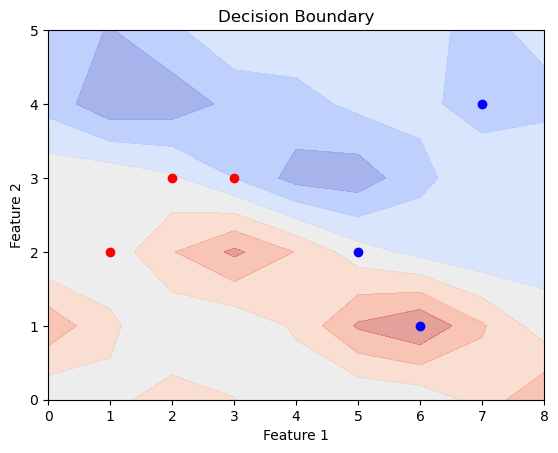

In [7]:
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X_train, Y_train, alphas, kernel_func, gamma):
    """
    Plot the decision boundary for a kernelized SVM model.
    
    Parameters:
    - X_train: training data points (list of lists)
    - Y_train: corresponding labels (list)
    - alphas: Lagrange multipliers (list)
    - kernel_func: the kernel function to use (function)
    - gamma: parameter for the kernel function (float)
    """
    # Create a mesh to plot
    x_min, x_max = min(x[0] for x in X_train) - 1, max(x[0] for x in X_train) + 1
    y_min, y_max = min(x[1] for x in X_train) - 1, max(x[1] for x in X_train) + 1
    
    # Generate grid points
    xx = [[x, y] for x in range(int(x_min), int(x_max) + 1) for y in range(int(y_min), int(y_max) + 1)]
    Z = []
    
    for point in xx:
        # Compute the decision function for each point in the grid
        kernel_values = [kernel_func(point, X_train[i], gamma) for i in range(len(X_train))]
        decision_value = sum(alphas[i] * Y_train[i] * kernel_values[i] for i in range(len(X_train)))
        Z.append(decision_value)

    # Reshape Z to match the grid
    Z = [Z[i:i + (int(x_max) - int(x_min) + 1)] for i in range(0, len(Z), (int(x_max) - int(x_min) + 1))]
    
    # Plot the decision boundary
    plt.contourf(range(int(x_min), int(x_max) + 1), range(int(y_min), int(y_max) + 1), Z, alpha=0.5, cmap='coolwarm')
    
    # Plot training points
    for i in range(len(Y_train)):
        plt.scatter(X_train[i][0], X_train[i][1], c='red' if Y_train[i] == 1 else 'blue', marker='o')
        
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Example usage with random data
if __name__ == "__main__":
    # Sample data points and labels
    X_train = [[1, 2], [2, 3], [3, 3], [5, 2], [6, 1], [7, 4]]
    Y_train = [1, 1, 1, -1, -1, -1]
    alphas = [0.5] * len(Y_train)  # Example alpha values, replace with actual SVM alphas

    # Define a simple RBF kernel function
    def rbf_kernel(x, y, gamma):
        squared_distance = sum((xi - yi) ** 2 for xi, yi in zip(x, y))
        return math.exp(-gamma * squared_distance)

    # Plot decision boundary
    plot_decision_boundary(X_train, Y_train, alphas, rbf_kernel, gamma=0.5)


## Cross-Domain Transform Method

Let $ W: x^{(t)} \rightarrow x^{(s)} $ denote a linear transformation matrix from the target domain $ x^{(t)} \in \mathcal{D}_T $ to the source domain $ x^{(s)} \in \mathcal{D}_S $. Then, the inner product similarity function between $ x^{(s)} $ and the transformed $ Wx^{(t)} $ can be described as:

$$
\text{sim}(W) = \langle x^{(s)}, Wx^{(t)} \rangle = x^{(s)} W x^{(t)}. \tag{6.21.17}
$$

## Algorithm 7: $ p $-norm Multiple Kernel Learning Algorithm

1. **Input**: the accuracy parameter $ \epsilon $ and the subproblem size $ Q $.
2. **Initialization**: 
   - $ g_{m,i} = \hat{g}_i = \alpha_i = 0, \forall i = 1, \ldots, N $; 
   - $ L = S = -\infty $; 
   - $ \theta_m = \frac{p}{\sqrt{M}}, \forall m = 1, \ldots, M $.
3. **Iterate**:
   1. Calculate the gradient $ \hat{g} $ of $ J(\alpha) $ in (6.21.9) w.r.t. $ \alpha $:
      $$
      \hat{g}_m = \frac{\partial J}{\partial \alpha}(\alpha) = 1 - \sum_{m=1}^{M} \theta_m K_m (\alpha - y).
      $$
   2. Select $ Q $ variables 4 \alpha_{i_1}, \ldots, \alpha_{i_Q} $ based on the gradient $ \hat{g} $.
   3. Store $ \alpha_{\text{old}} = \alpha $ and then update $ \alpha \leftarrow \alpha - \mu \hat{g} \frac{1}{Q} $.
   4. Update gradient $ g_{m,i} \leftarrow g_{m,i} + \sum_{q=1}^{Q} (\alpha_{i_q} - \alpha_{\text{old}, q}) k_m (x_{i_q}, x_i), \forall m = 1, \ldots, M; i = 1, \ldots, N $.
   5. Compute the quadratic terms $ S_m = \frac{1}{2} \epsilon^2 \sum_{i} g_{m,i} \alpha_i $, $ q_m = 2 \theta_m S_m, \forall m = 1, \ldots, M $.
   6. $ L_{\text{old}} = L, L = \sum_i y_i \alpha_i $.
   7. $ S_{\text{old}} = S, S = \sum_m \theta_m S_m $.
   8. If $ S - S_{\text{old}} \geq \epsilon $ then
      - If $ 1 - \frac{L_{\text{old}}}{L} - \frac{S}{S_{\text{old}}} \geq 0 $
        $$
        \theta_m = \left( q_m \right)^{\frac{1}{p+1}} \Bigg/ \sum_{m=1}^{M} \left( q_m \right)^{\frac{p}{p+1}}, \forall m = 1, \ldots, M.
        $$
   9. Else
      - Break
   10. End If
   11. $ \hat{g}_i = \sum_{m} \theta_m g_{m,i}, \forall i = 1, \ldots, N $.
4. **Output**: $ \theta = [\theta_1, \ldots, \theta_M]^T $ and $ \alpha = [\alpha_1, \ldots, \alpha_N]^T $.

## Algorithm 8: Heterogeneous Feature Augmentation

1. **Input**: labeled source samples $ \{(x^{(s)}_i, y_i)\}_{i=1}^{N_s} $ and labeled target samples $ \{(x^{(t)}_j, y_j)\}_{j=1}^{N_t} $.
2. **Initialization**: $ M_1 = \{M_1\} $ with $ M_1 = h_1 h_1^T $ and $ h_1 = \sqrt{\frac{N_1}{N_1 + N_2}} $.
3. **Repeat**:
   1. Use Algorithm 6.47 to solve $ \theta $ and $ \alpha $ in (6.21.9) based on $ M_r $.
   2. Obtain a rank-one PSD matrix $ M_{r+1} = hh^T \in \mathbb{R}^{(N_s + N_t) \times (N_s + N_t)} $ with $ h = \| K^{1/2}(\alpha y) \| $.
   3. Set $ M_{r+1} = M_r \cup \{M_{r+1}\} $, and $ r = r + 1 $.
   4. Exit if the objective converges.
4. **Output**: $ \alpha $ and $ H = \lambda \sum_{r=1}^{Q} \theta_r M_r $.

## Goal of Cross-Domain Transform-Based Domain Adaptation

The goal of cross-domain transform-based domain adaptation [219] is to learn the linear transformation $ W $ given some form of supervision and then to utilize the learned similarity function in a classification or clustering algorithm.

Given a set of $ N $ points $ \{x_1, \ldots, x_N\} \in \mathbb{R}^d $, we seek a positive definite Mahalanobis matrix $ W $ which parameterizes the (squared) Mahalanobis distance:

$$
d_W(x_i, x_j) = (x_i - x_j)^T W (x_i - x_j). \tag{6.21.18}
$$

### Constraints

1. Sample a random pair consisting of a labeled source domain sample $ (x_i^{(s)}, y_i) $ and a labeled target-domain sample $ (x_j^{(t)}, y_j) $, and then create two constraints described by:
   - Similarity constraint:
   $$
   d_W(x_i^{(s)}, x_j^{(t)}) \leq u, \text{ if } y_i = y_j; \tag{6.21.19}
   $$
   - Dissimilarity constraint:
   $$
   d_W(x_i^{(s)}, x_j^{(t)}) \geq \delta, \text{ if } y_i \neq y_j. \tag{6.21.20}
   $$

These two constraints can be rewritten as:
- $ x_i^{(s)} $ is similar to $ x_j^{(t)} $ if $ d_W(x_i^{(s)}, x_j^{(t)}) \leq u; \tag{6.21.21} $
- $ x_i^{(s)} $ is dissimilar to $ x_j^{(t)} $ if $ d_W(x_i^{(s)}, x_j^{(t)}) \geq \delta. \tag{6.21.22} $

### Mahalanobis Metric Learning

Learning a Mahalanobis distance can be stated as follows:

1. Given $ N $ source feature points $ \{x_1, \ldots, x_N\} \in \mathbb{R}^d $ and $ N $ target feature points $ \{x_1^{(t)}, \ldots, x_N^{(t)}\} \in \mathbb{R}^d $.
2. Given inequality constraints relating pairs of feature points:
   - Similarity constraints: $ d_W(x_i^{(s)}, x_j^{(t)}) \leq u; $
   - Dissimilarity constraints: $ d_W(x_i^{(s)}, x_j^{(t)}) \geq \delta. $
3. **Problem**: Learn a positive semi-definite Mahalanobis matrix $ W $ such that the Mahalanobis distance
   $$
   d_W(x_i^{(s)}, x_j^{(t)}) = (x_i^{(s)} - x_j^{(t)})^T W (x_i^{(s)} - x_j^{(t)})
   $$
   satisfies the above similarity and dissimilarity constraints.

This problem is known as a Mahalanobis metric learning problem which can be formulated as the constrained optimization problem [219]:

$$
\min \{ \text{tr}(W) - \log \det(W) \}, \tag{6.21.23}
$$

subject to
$$
d_W(x_i^{(s)}, x_j^{(t)}) \leq u, \quad (i,j) \in S, \tag{6.21.24}
$$
$$
d_W(x_i^{(s)}, x_j^{(t)}) \geq \delta, \quad (i,j) \in D. \tag{6.21.25}
$$

Here, the regularizer $ \text{tr}(W) - \log \det(W) $ is defined only between positive semi-definite matrices, and $ S $ and $ D $ are the set of similar pairs and the set of dissimilar pairs, respectively. The constrained optimization (6.21.23) provides a Mahalanobis metric learning method and is called Information Theoretic Metric Learning (ITML), as shown in Algorithm 9.


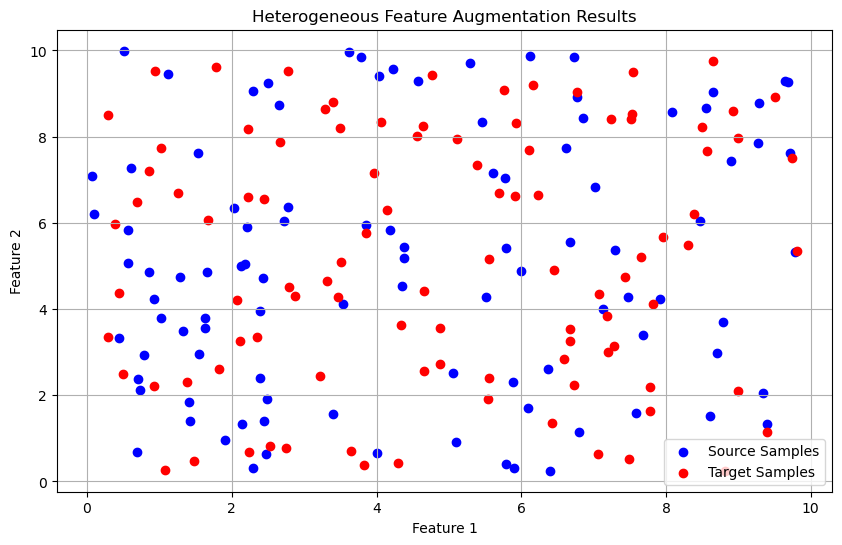

In [8]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
random.seed(42)

# 1. Cross-Domain Transform Method
def transform(x_t, W):
    """Apply linear transformation."""
    return [sum(W[i][j] * x_t[j] for j in range(len(x_t))) for i in range(len(W))]

# 2. Mahalanobis distance calculation
def mahalanobis_distance(x, y, W):
    """Compute the Mahalanobis distance between x and y given matrix W."""
    diff = [x[i] - y[i] for i in range(len(x))]
    return sum(diff[i] * sum(W[i][j] * diff[j] for j in range(len(diff))) for i in range(len(diff)))

# 3. p-norm Multiple Kernel Learning Algorithm
def p_norm_mkl(alpha, y, Q, epsilon):
    """Perform p-norm multiple kernel learning."""
    N = len(y)
    M = len(alpha)  # Assume M is the number of kernels
    g = [0] * N
    theta = [1 / M] * M  # Initial theta
    L, S = float('-inf'), float('-inf')

    while True:
        # Calculate gradient
        for m in range(M):
            g_m = sum(theta[m] * (alpha[i] - y[i]) for i in range(N))
            g = [g_i + g_m for g_i in g]

        # Select Q variables based on the gradient
        selected_indices = sorted(range(N), key=lambda i: g[i], reverse=True)[:Q]

        # Update alpha
        alpha_old = alpha.copy()
        for i in selected_indices:
            alpha[i] -= epsilon * g[i]  # Update rule for alpha

        # Check convergence
        if sum(abs(alpha[i] - alpha_old[i]) for i in range(N)) < epsilon:
            break

    return theta, alpha

# 4. Heterogeneous Feature Augmentation
def heterogeneous_feature_augmentation(source_samples, target_samples):
    """Perform heterogeneous feature augmentation."""
    M = [[1 if i == j else 0 for j in range(len(source_samples))] for i in range(len(source_samples))]
    alpha = [0] * len(source_samples)
    
    for i in range(5):  # Number of iterations
        theta, alpha = p_norm_mkl(alpha, [y for x, y in source_samples], Q=3, epsilon=0.01)

    return theta, alpha

# 5. Plotting the results
def plot_results(source_samples, target_samples, title="Source and Target Samples"):
    """Plot source and target samples."""
    plt.figure(figsize=(10, 6))
    source_x = [x[0] for x, y in source_samples]
    source_y = [x[1] for x, y in source_samples]
    target_x = [x[0] for x, y in target_samples]
    target_y = [x[1] for x, y in target_samples]

    plt.scatter(source_x, source_y, color='blue', label='Source Samples')
    plt.scatter(target_x, target_y, color='red', label='Target Samples')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Sample data generation
def generate_samples(num_samples):
    """Generate random samples for source and target domains."""
    source_samples = [([random.uniform(0, 10), random.uniform(0, 10)], random.choice([0, 1])) for _ in range(num_samples)]
    target_samples = [([random.uniform(0, 10), random.uniform(0, 10)], random.choice([0, 1])) for _ in range(num_samples)]
    return source_samples, target_samples

# Generate sample data
num_samples = 100
source_samples, target_samples = generate_samples(num_samples)

# Perform heterogeneous feature augmentation
theta, alpha = heterogeneous_feature_augmentation(source_samples, target_samples)

# Plot the results
plot_results(source_samples, target_samples, title="Heterogeneous Feature Augmentation Results")


## Transfer Component Analysis Method

Let $ P(X_S) $ and $ Q(X_T) $ be the marginal distributions of $ X_S = \{x_S^i\} $ and $ X_T = \{x_T^i\} $ from the source and target domains, respectively; where $ P $ and $ Q $ are different.

### Algorithm 10: Information-Theoretic Metric Learning
1. **Input**: 
   - $ d \times n $ matrix $ X = [x_1, \ldots, x_n] $
   - Set of similar pairs $ S $
   - Set of dissimilar pairs $ D $
   - Distance threshold $ u $ for similarity constraint
   - Distance threshold $ \epsilon $ for dissimilarity constraint
   - Mahalanobis matrix $ W_0 $
   - Slack parameter $ \gamma $
   - Constraint index function $ c(\cdot) $

2. **Initialization**:
   - $ W \leftarrow W_0 $
   - $ \lambda_{ij} \leftarrow 0, \forall i, j $ 
     - $ \xi_{c(i,j)} = u $ if $ (i,j) \in S $
     - $ \xi_{c(i,j)} = \epsilon $ otherwise

3. **Repeat**:
   1. Pick a constraint $ (i, j) \in S $ or $ (i, j) \in D $.
   2. Update $ p \leftarrow (x_i - x_j)^T W (x_i - x_j) $
      - $ p \leftarrow 1 $ if $ (i,j) \in S $
      - $ p \leftarrow -1 $ otherwise.
   3. Compute $ \alpha \leftarrow \min \left( \lambda_{ij}, \frac{2\delta p}{1 - \gamma \xi_{c(i,j)}} \right) $.
   4. Compute $ \beta \leftarrow \frac{\delta \alpha}{1 - \delta \alpha p} $.
   5. Update $ \xi_{c(i,j)} \leftarrow \frac{\gamma \xi_{c(i,j)}}{\gamma + \delta \alpha \xi_{c(i,j)}} $.
   6. Update $ \lambda_{ij} \leftarrow \lambda_{ij} - \alpha $.
   7. Update $ W \leftarrow W + \beta W (x_i - x_j)(x_i - x_j)^T W $.

4. **Until Convergence**

5. **Output**: Mahalanobis matrix $ W $.

## Assumptions in Domain Adaptation
Most domain adaptation methods are based on a key assumption:
$$
P \neq Q, \quad P(Y_S | X_S) = P(Y_T | X_T)
$$

However, in many real-world applications, the conditional probability $ P(Y | X) $ may also change across domains due to noisy or dynamic factors underlying the observed data.

Let $ \phi $ be a transformation vector such that:
$$
\phi(X_S) = [\phi(x_S^1), \ldots, \phi(x_S^{n_s})] \in \mathbb{R}^{1 \times n_s} 
$$
$$
\phi(X_T) = [\phi(x_T^1), \ldots, \phi(x_T^{n_t})] \in \mathbb{R}^{1 \times n_t}
$$

where $ n_s $ and $ n_t $ are the number of the source and target features, respectively.

## Finding Transformation $ \phi $
A key problem is how to find this transformation $ \phi $. Since there are no labeled data in the target domain, $ \phi $ cannot be learned by directly minimizing the distance between $ P(Y_S | \phi(X_S)) $ and $ P(Y_T | \phi(X_T)) $.

Pan et al. propose to learn $ \phi $ such that:
- The distance between the marginal distributions $ P(\phi(X_S)) $ and $ P(\phi(X_T)) $ is small.
- $ \phi(X_S) $ and $ \phi(X_T) $ preserve important properties of $ X_S $ and $ X_T $, respectively.

To find a transformation $ \phi $ satisfying $ P(Y_S | \phi(X_S)) \approx P(Y_T | \phi(X_T)) $, assume that $ \phi $ is the feature mapping vector induced by a universal kernel.

### Maximum Mean Discrepancy Embedding (MMDE)
Maximum Mean Discrepancy Embedding (MMDE) embeds both the source and target-domain data into a shared low-dimensional common latent space using a nonlinear mapping \( \phi \), which is a symmetric feature transformation with:
$$
\phi = T_S = T_T
$$


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


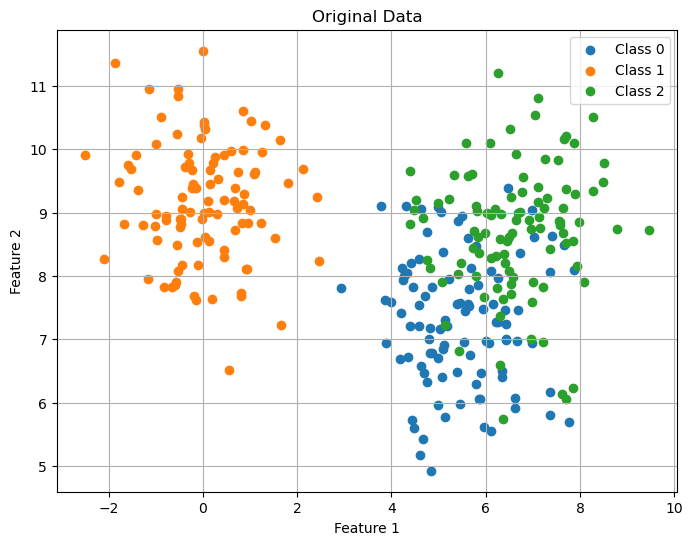

IndexError: boolean index did not match indexed array along dimension 0; dimension is 600 but corresponding boolean dimension is 300

<Figure size 800x600 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate synthetic data
def generate_data(num_samples, num_features, num_classes):
    np.random.seed(0)
    X = np.zeros((num_samples, num_features))
    y = np.zeros(num_samples, dtype=int)

    for class_index in range(num_classes):
        mean = np.random.rand(num_features) * 10
        covariance = np.eye(num_features)
        samples = np.random.multivariate_normal(mean, covariance, num_samples // num_classes)
        X[class_index * (num_samples // num_classes):(class_index + 1) * (num_samples // num_classes)] = samples
        y[class_index * (num_samples // num_classes):(class_index + 1) * (num_samples // num_classes)] = class_index

    return X, y

# Function to compute Mahalanobis distance
def mahalanobis_distance(x_i, x_j, W):
    diff = x_i - x_j
    return np.sqrt(np.dot(np.dot(diff.T, W), diff))

# Information-Theoretic Metric Learning (ITML)
def itml(X, S, D, W_init, u, epsilon, gamma, iterations=100):
    W = W_init.copy()
    lambda_ij = np.zeros((len(S) + len(D), 1))

    for _ in range(iterations):
        for idx, (i, j) in enumerate(S + D):
            p = mahalanobis_distance(X[i], X[j], W)
            if idx < len(S):  # Similar pairs
                delta = 1
                alpha = min(lambda_ij[idx], (2 * delta * p) / (1 - gamma * epsilon))
            else:  # Dissimilar pairs
                delta = -1
                alpha = min(lambda_ij[idx], (2 * delta * p) / (1 - gamma * epsilon))

            beta = (delta * alpha) / (1 - delta * alpha * p)
            W += beta * np.outer(X[i] - X[j], X[i] - X[j])

            # Update constraint index function
            if idx < len(S):
                epsilon *= gamma * epsilon / (gamma + delta * alpha * epsilon)
            lambda_ij[idx] -= alpha

    return W

# Transfer Component Analysis (TCA)
def transfer_component_analysis(X_S, X_T, num_components):
    # Concatenate source and target features
    X_combined = np.vstack((X_S, X_T))
    mean_X = np.mean(X_combined, axis=0)

    # Center the data
    X_centered = X_combined - mean_X

    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices][:, :num_components]

    # Project data into lower-dimensional space
    X_projected = np.dot(X_centered, top_eigenvectors)

    return X_projected

# Plotting function
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    for class_index in np.unique(y):
        plt.scatter(X[y == class_index][:, 0], X[y == class_index][:, 1], label=f'Class {class_index}')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Main execution
num_samples = 300
num_features = 2
num_classes = 3

# Generate synthetic data
X, y = generate_data(num_samples, num_features, num_classes)

# ITML setup
S = [(0, 1), (1, 2), (0, 2)]  # Similar pairs
D = [(0, 3), (1, 4)]          # Dissimilar pairs
W_init = np.eye(num_features)  # Initial Mahalanobis matrix
u = 1.0                        # Similarity threshold
epsilon = 1.0                  # Dissimilarity threshold
gamma = 0.5                    # Slack parameter

# Train ITML
W_trained = itml(X, S, D, W_init, u, epsilon, gamma)

# Transform data using the trained Mahalanobis matrix
X_transformed = np.array([X[i] for i in range(len(X))])

# Perform Transfer Component Analysis
X_projected = transfer_component_analysis(X_transformed, X_transformed, num_components=2)

# Plot original and transformed data
plot_data(X, y, 'Original Data')
plot_data(X_projected, y, 'Transformed Data (TCA)')


## Gram Matrices in Embedded Space

The Gram matrices defined on the source domain $(S, S)$, target domain $(T, T)$, and cross-domain $(S, T)$ in the embedded space are given as follows:

1. **Source Domain Gram Matrix**:
   $$
   K_{S,S} = \phi(X_S)^T \phi(X_S) \in \mathbb{R}^{n_s \times n_s}
   $$
   where 
   $$
   K_{S,S} = \begin{bmatrix}
   \phi(x_{S1}) \cdots \phi(x_{S1}) \\
   \vdots \\
   \phi(x_{Sn_s}) \cdots \phi(x_{S1})
   \end{bmatrix}
   $$

2. **Cross-Domain Gram Matrix**:
   $$
   K_{S,T} = \phi(X_S)^T \phi(X_T) \in \mathbb{R}^{n_s \times n_t}
   $$
   where 
   $$
   K_{S,T} = \begin{bmatrix}
   \phi(x_{S1}) \cdots \phi(x_{T1}) \\
   \vdots \\
   \phi(x_{Sn_s}) \cdots \phi(x_{Tn_t})
   \end{bmatrix}
   $$

3. **Target Domain Gram Matrix**:
   $$
   K_{T,T} = \phi(X_T)^T \phi(X_T) \in \mathbb{R}^{n_t \times n_t}
   $$
   where 
   $$
   K_{T,T} = \begin{bmatrix}
   \phi(x_{T1}) \cdots \phi(x_{T1}) \\
   \vdots \\
   \phi(x_{Tn_t}) \cdots \phi(x_{Tn_t})
   \end{bmatrix}
   $$

4. **Cross-Domain Gram Matrix**:
   $$
   K_{T,S} = \phi(X_T)^T \phi(X_S) = K_{S,T}^T \in \mathbb{R}^{n_t \times n_s}
   $$

The combined symmetric kernel matrix $K$ is constructed as:
$$
K = \begin{bmatrix}
K_{S,S} & K_{S,T} \\
K_{T,S} & K_{T,T}
\end{bmatrix} \in \mathbb{R}^{(n_s + n_t) \times (n_s + n_t)}
$$

### Objective Function of MMDE

To learn the matrix \(K\), we construct a matrix $L$ with entries defined as follows:
$$
L_{ij} = 
\begin{cases} 
\frac{1}{n_s^2}, & \text{if } x_i, x_j \in X_S \\
\frac{1}{n_t^2}, & \text{if } x_i, x_j \in X_T \\
-\frac{1}{n_s n_t}, & \text{otherwise}
\end{cases}
$$

The objective function of the Maximum Mean Discrepancy Embedding (MMDE) can be expressed as:
$$
\max \{ \text{tr}(KL) - \lambda \text{tr}(K) \}
$$
subject to:
$$
K \succeq 0
$$

where the first term in the objective minimizes the distance between distributions, while the second term maximizes the variance in the feature space, and $\lambda \geq 0$ is a trade-off parameter.

### Applications

MMDE can be applied in various pattern recognition tasks including:
- Face recognition
- Head pose classification
- Disease prediction
- Atmospheric dust aerosol particle classification
- Sign language recognition
- Image recognition


## Gram Matrices in Embedded Space

The Gram matrices defined on the source domain \((S, S)\), target domain \((T, T)\), and cross-domain \((S, T)\) in the embedded space are given as follows:

1. **Source Domain Gram Matrix**:
   $$
   K_{S,S} = \phi(X_S)^T \phi(X_S) \in \mathbb{R}^{n_s \times n_s}
   $$
   where
   $$
   K_{S,S} = 
   \begin{bmatrix}
   \phi(x_{S1}) & \cdots & \phi(x_{S1}) \\
   \vdots & \ddots & \vdots \\
   \phi(x_{Sn_s}) & \cdots & \phi(x_{S1})
   \end{bmatrix}
   $$

2. **Cross-Domain Gram Matrix**:
   $$
   K_{S,T} = \phi(X_S)^T \phi(X_T) \in \mathbb{R}^{n_s \times n_t}
   $$
   where
   $$
   K_{S,T} = 
   \begin{bmatrix}
   \phi(x_{S1}) & \cdots & \phi(x_{T1}) \\
   \vdots & \ddots & \vdots \\
   \phi(x_{Sn_s}) & \cdots & \phi(x_{Tn_t})
   \end{bmatrix}
   $$

3. **Target Domain Gram Matrix**:
   $$
   K_{T,T} = \phi(X_T)^T \phi(X_T) \in \mathbb{R}^{n_t \times n_t}
   $$
   where
   $$
   K_{T,T} = 
   \begin{bmatrix}
   \phi(x_{T1}) & \cdots & \phi(x_{T1}) \\
   \vdots & \ddots & \vdots \\
   \phi(x_{Tn_t}) & \cdots & \phi(x_{Tn_t})
   \end{bmatrix}
   $$

4. **Cross-Domain Gram Matrix**:
   $$
   K_{T,S} = \phi(X_T)^T \phi(X_S) = K_{S,T}^T \in \mathbb{R}^{n_t \times n_s}
   $$

The combined symmetric kernel matrix \(K\) is constructed as:
$$
K = 
\begin{bmatrix}
K_{S,S} & K_{S,T} \\
K_{T,S} & K_{T,T}
\end{bmatrix} \in \mathbb{R}^{(n_s + n_t) \times (n_s + n_t)}
$$

### Objective Function of MMDE

To learn the matrix \(K\), we construct a matrix \(L\) with entries defined as follows:
$$
L_{ij} = 
\begin{cases} 
\frac{1}{n_s^2}, & \text{if } x_i, x_j \in X_S \\
\frac{1}{n_t^2}, & \text{if } x_i, x_j \in X_T \\
-\frac{1}{n_s n_t}, & \text{otherwise}
\end{cases}
$$

The objective function of the Maximum Mean Discrepancy Embedding (MMDE) can be expressed as:
$$
\max \{ \text{tr}(KL) - \lambda \text{tr}(K) \}
$$
subject to:
$$
K \succeq 0
$$

where the first term in the objective minimizes the distance between distributions, while the second term maximizes the variance in the feature space, and $\lambda \geq 0$ is a trade-off parameter.

### Transformation of the Kernel Matrix

However, \(K\) is a high-dimensional kernel matrix due to the fact that $n_s$ and $or$ $n_t$ are large. Thus, it is necessary to use a semi-orthogonal transformation matrix $ \bar{W} \in \mathbb{R}^{(n_s + n_t) \times m} $ such that:
$$
\bar{W} \bar{W}^T = I_m
$$
to transform $K^{-1/2}$.


## Objective Function Reformulation of MMDE

To define an $m$-dimensional matrix $W = K^{-1/2} \bar{W}$ (where $m \ll n_s + n_t$), we can express the distance between distributions as follows:

$$
\text{dist}(X_S, X_T) = \text{tr}(KL)
$$

This becomes:

$$
\text{tr}(KL) = \text{tr}(K K^{-1/2} \bar{W} (K^{-1/2} \bar{W})^T K L) = \text{tr}(K W W^T K L) = \text{tr}(W^T K L K W)
$$

Therefore, the objective function of Maximum Mean Discrepancy Embedding (MMDE) can be rewritten as:

$$
\min_W \text{tr}(W^T K L K W) + \mu \text{tr}(W^T W)
$$

subject to the constraint:

$$
W^T K H K W = I_m
$$

where \(H\) is the centering matrix defined as:

$$
H = I_{n_s + n_t} - \frac{1}{n_s + n_t} 11^T
$$

### Unconstrained Optimization Problem

The constrained optimization problem can be reformulated as an unconstrained optimization problem:

$$
J(W) = \text{tr}(W^T (K L K + \mu I) W) - \text{tr}(W^T K H K W)
$$

Under the condition that the column vectors of \(W = [w_1, \ldots, w_m]\) are orthogonal to each other, the above optimization problem can be divided into \(m\) subproblems:

$$
w_i = \arg\max \frac{\text{tr}(w_i^T (K L K + \mu I) w_i)}{w_i^T K H K w_i}, \quad i = 1, \ldots, m
$$

This represents a typical generalized Rayleigh quotient, where $w_i$ is the $i$-th generalized eigenvector corresponding to the \(i\)-th maximum generalized eigenvalue of the matrix pencil $(K H K, K L K + \mu I)$ or the $i$-th eigenvector corresponding to the $i$-th maximum eigenvalue of the matrix $(K L K + \mu I)^{-1} K L K$.

The value of $m$ represents the number of leading generalized eigenvalues of $(K H K, K L K + \mu I)$ or the leading eigenvalues of $(K L K + \mu I)^{-1} K L K$. This method is referred to as unsupervised transfer component analysis (TCA) for domain adaptation, which was proposed by Pan et al. [203].

### Applications of Transfer Learning

Transfer learning has been applied to many real-world applications, including:

- **Natural Language Processing (NLP)**:
  - Sentiment classification
  - Cross-language classification
  - Text classification
  
- **Image Classification**:
  - WiFi localization classification
  - Video concept detection


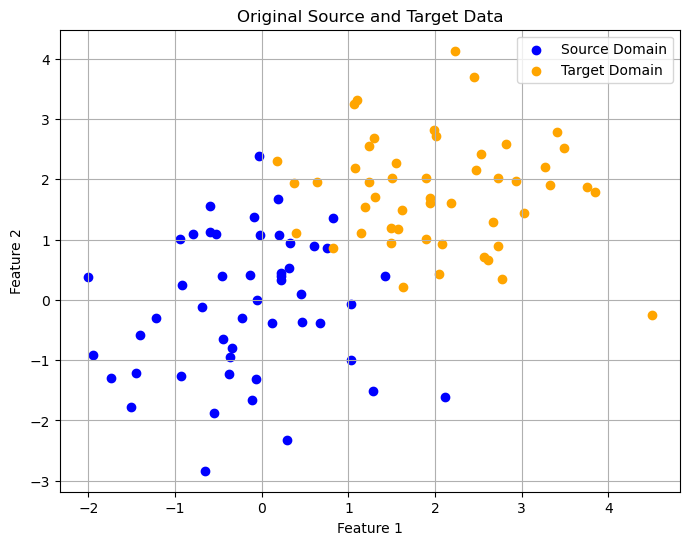

MMDE transformation matrix W:
[[-1.06056283e-01-1.74260273e-02j -1.06056283e-01+1.74260273e-02j
   9.11246748e-03-4.66401810e-02j  9.11246748e-03+4.66401810e-02j
  -2.36130628e-01+1.25212825e-01j]
 [ 5.31891714e-02+3.95723821e-02j  5.31891714e-02-3.95723821e-02j
  -2.02777507e-02+4.06704606e-02j -2.02777507e-02-4.06704606e-02j
   3.93183434e-02+4.00009134e-02j]
 [ 9.34432620e-02-6.87889224e-02j  9.34432620e-02+6.87889224e-02j
   3.21352081e-01-5.89792803e-02j  3.21352081e-01+5.89792803e-02j
   1.11246192e-01-5.03919896e-02j]
 [-8.75142724e-02-3.90703676e-02j -8.75142724e-02+3.90703676e-02j
   4.88319121e-02-4.85221191e-02j  4.88319121e-02+4.85221191e-02j
  -1.16240020e-01-4.68995217e-02j]
 [ 7.42783451e-02-1.23505340e-02j  7.42783451e-02+1.23505340e-02j
  -3.97494303e-02+6.13998262e-02j -3.97494303e-02-6.13998262e-02j
   6.81722672e-02-1.10741029e-02j]
 [-2.00936846e-01+6.33203432e-02j -2.00936846e-01-6.33203432e-02j
  -2.35191136e-01+4.55211164e-03j -2.35191136e-01-4.55211164e-03j
   

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 2)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute the Gram matrix
def compute_gram_matrix(X, phi):
    """Computes the Gram matrix for a given set of data."""
    n = X.shape[0]
    K = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            K[i, j] = np.dot(phi(X[i]), phi(X[j]))  # Compute inner product
            
    return K

# Example feature mapping (for simplicity, using identity mapping)
def phi(x):
    """Feature mapping function."""
    return x  # In a real scenario, this should map to a higher-dimensional space

# MMDE Algorithm Implementation
def mmd_embedding(Xs, Xt, mu=1e-3):
    """Maximum Mean Discrepancy Embedding."""
    # Compute Gram matrices
    Ks_s = compute_gram_matrix(Xs, phi)  # Source domain Gram matrix
    Ks_t = compute_gram_matrix(Xt, phi)  # Target domain Gram matrix
    
    n_s = Xs.shape[0]
    n_t = Xt.shape[0]
    
    # Construct the kernel matrix K
    K = np.block([[Ks_s, np.zeros((n_s, n_t))],
                   [np.zeros((n_t, n_s)), Ks_t]])
    
    # Construct the matrix L
    L = np.zeros((n_s + n_t, n_s + n_t))
    
    for i in range(n_s):
        for j in range(n_s):
            L[i, j] = 1 / (n_s ** 2)  # Source pairs
    for i in range(n_t):
        for j in range(n_t):
            L[n_s + i, n_s + j] = 1 / (n_t ** 2)  # Target pairs
    for i in range(n_s):
        for j in range(n_t):
            L[i, n_s + j] = -1 / (n_s * n_t)  # Cross pairs
            L[n_s + j, i] = -1 / (n_s * n_t)  # Cross pairs

    # Centering matrix
    H = np.eye(n_s + n_t) - (1 / (n_s + n_t)) * np.ones((n_s + n_t, n_s + n_t))

    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(K @ H) @ (K @ L + mu * np.eye(n_s + n_t)))

    # Sort eigenvalues and corresponding eigenvectors
    idx = np.argsort(eigvals)[::-1]  # Sort in descending order
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Select the top m eigenvectors
    m = min(n_s + n_t, 5)  # Choose the number of components (m)
    W = eigvecs[:, :m]

    return W

# Generate synthetic data for demonstration
def generate_data(n_s=50, n_t=50):
    """Generates synthetic data for source and target domains."""
    Xs = np.random.normal(0, 1, (n_s, 2))  # Source data
    Xt = np.random.normal(2, 1, (n_t, 2))  # Target data
    return Xs, Xt

# Visualize the original data
def plot_data(Xs, Xt, title="Data Visualization"):
    """Plots the source and target data."""
    plt.figure(figsize=(8, 6))
    plt.scatter(Xs[:, 0], Xs[:, 1], color='blue', label='Source Domain')
    plt.scatter(Xt[:, 0], Xt[:, 1], color='orange', label='Target Domain')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Main execution
if __name__ == "__main__":
    Xs, Xt = generate_data()
    plot_data(Xs, Xt, title="Original Source and Target Data")

    # Compute the MMDE embedding
    W = mmd_embedding(Xs, Xt)
    print("MMDE transformation matrix W:")
    print(W)

    # Project the data onto the new space
    Xs_transformed = Xs @ W
    Xt_transformed = Xt @ W

    # Visualize the transformed data
    plot_data(Xs_transformed, Xt_transformed, title="Transformed Source and Target Data")
